In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", color_codes=True)

In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education',
            'education-num', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'capital-gain',
            'capital-loss', 'hours-per-week', 'native-country',
            'income'
            ]
df = pd.read_csv('data/adult.data', header=None, names=col_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
cat_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
num_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df_categorial = df[cat_vars]
df_numerical = df[num_vars]

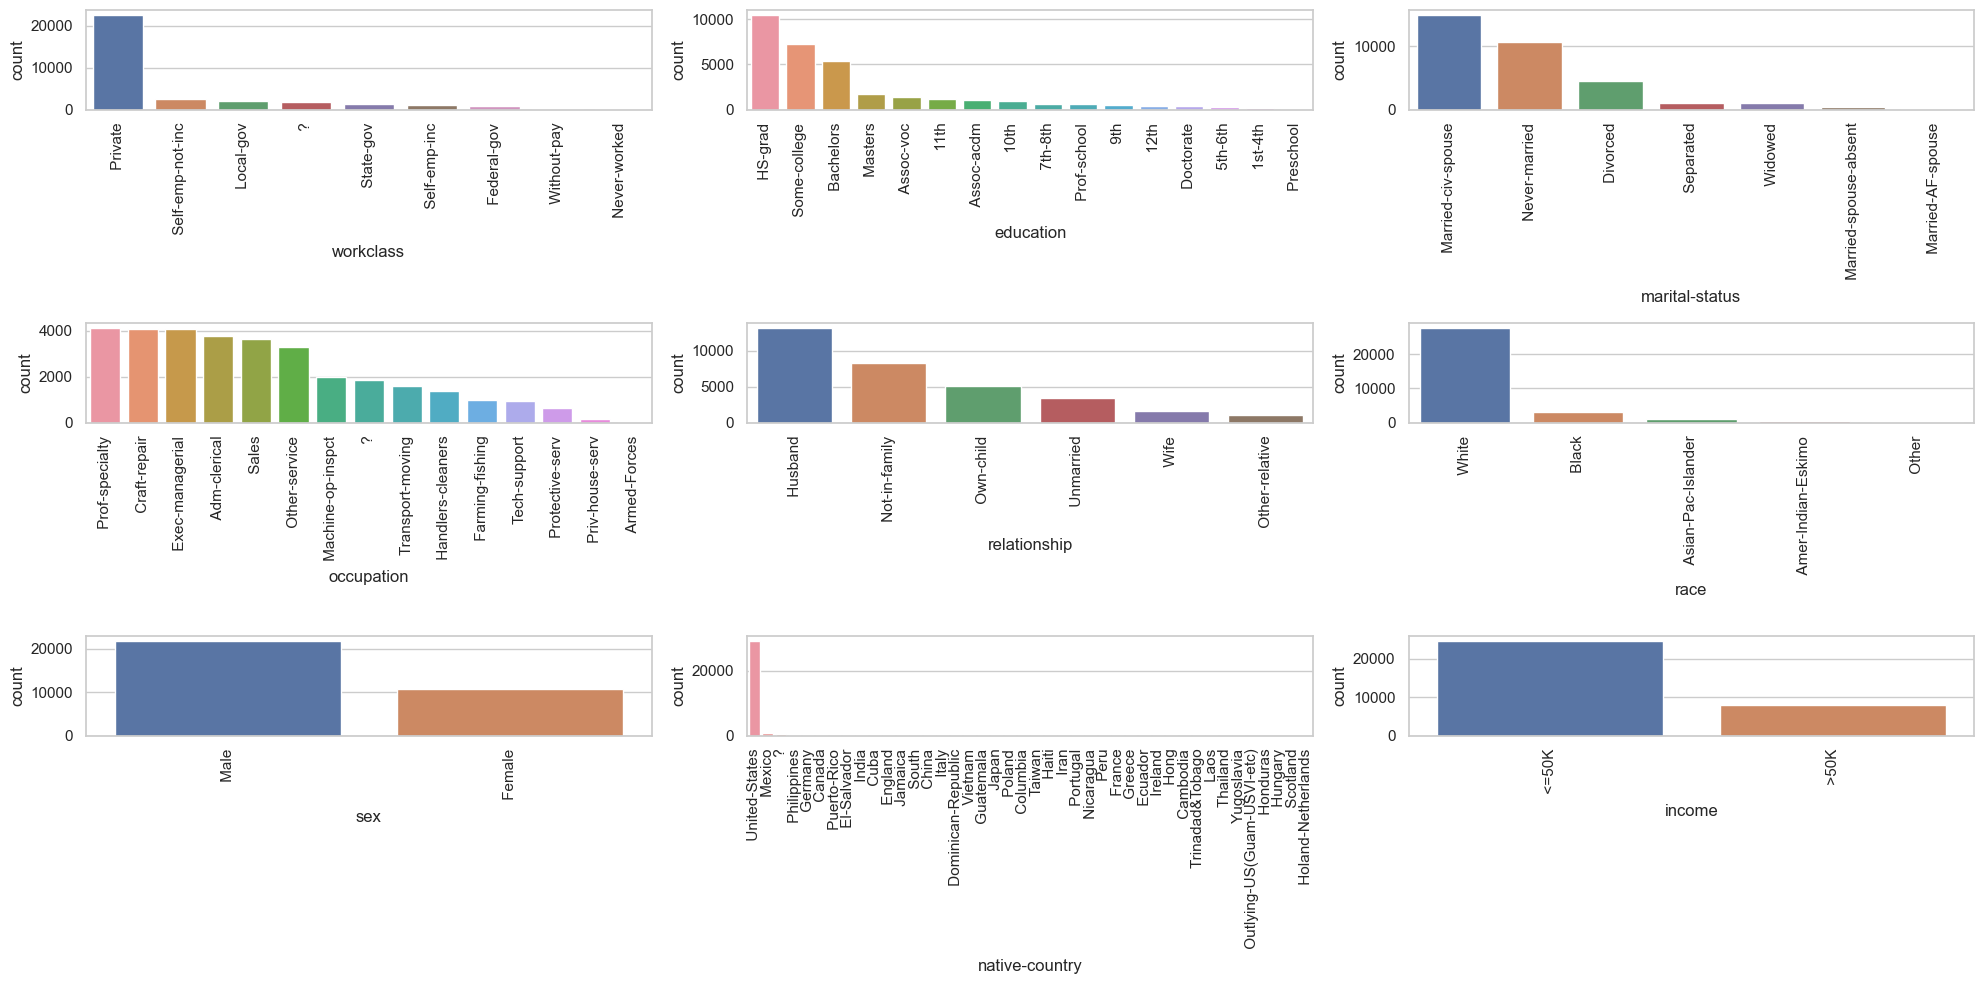

In [72]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df_categorial, ax=axs[i], order=df_categorial[var].value_counts().index)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xlabel(var)

fig.tight_layout()

plt.show()

/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_81412/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_81412/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_81412/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_81412/482783700.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_81412/482783700.py:6: UserWarning: FixedFormatter should only

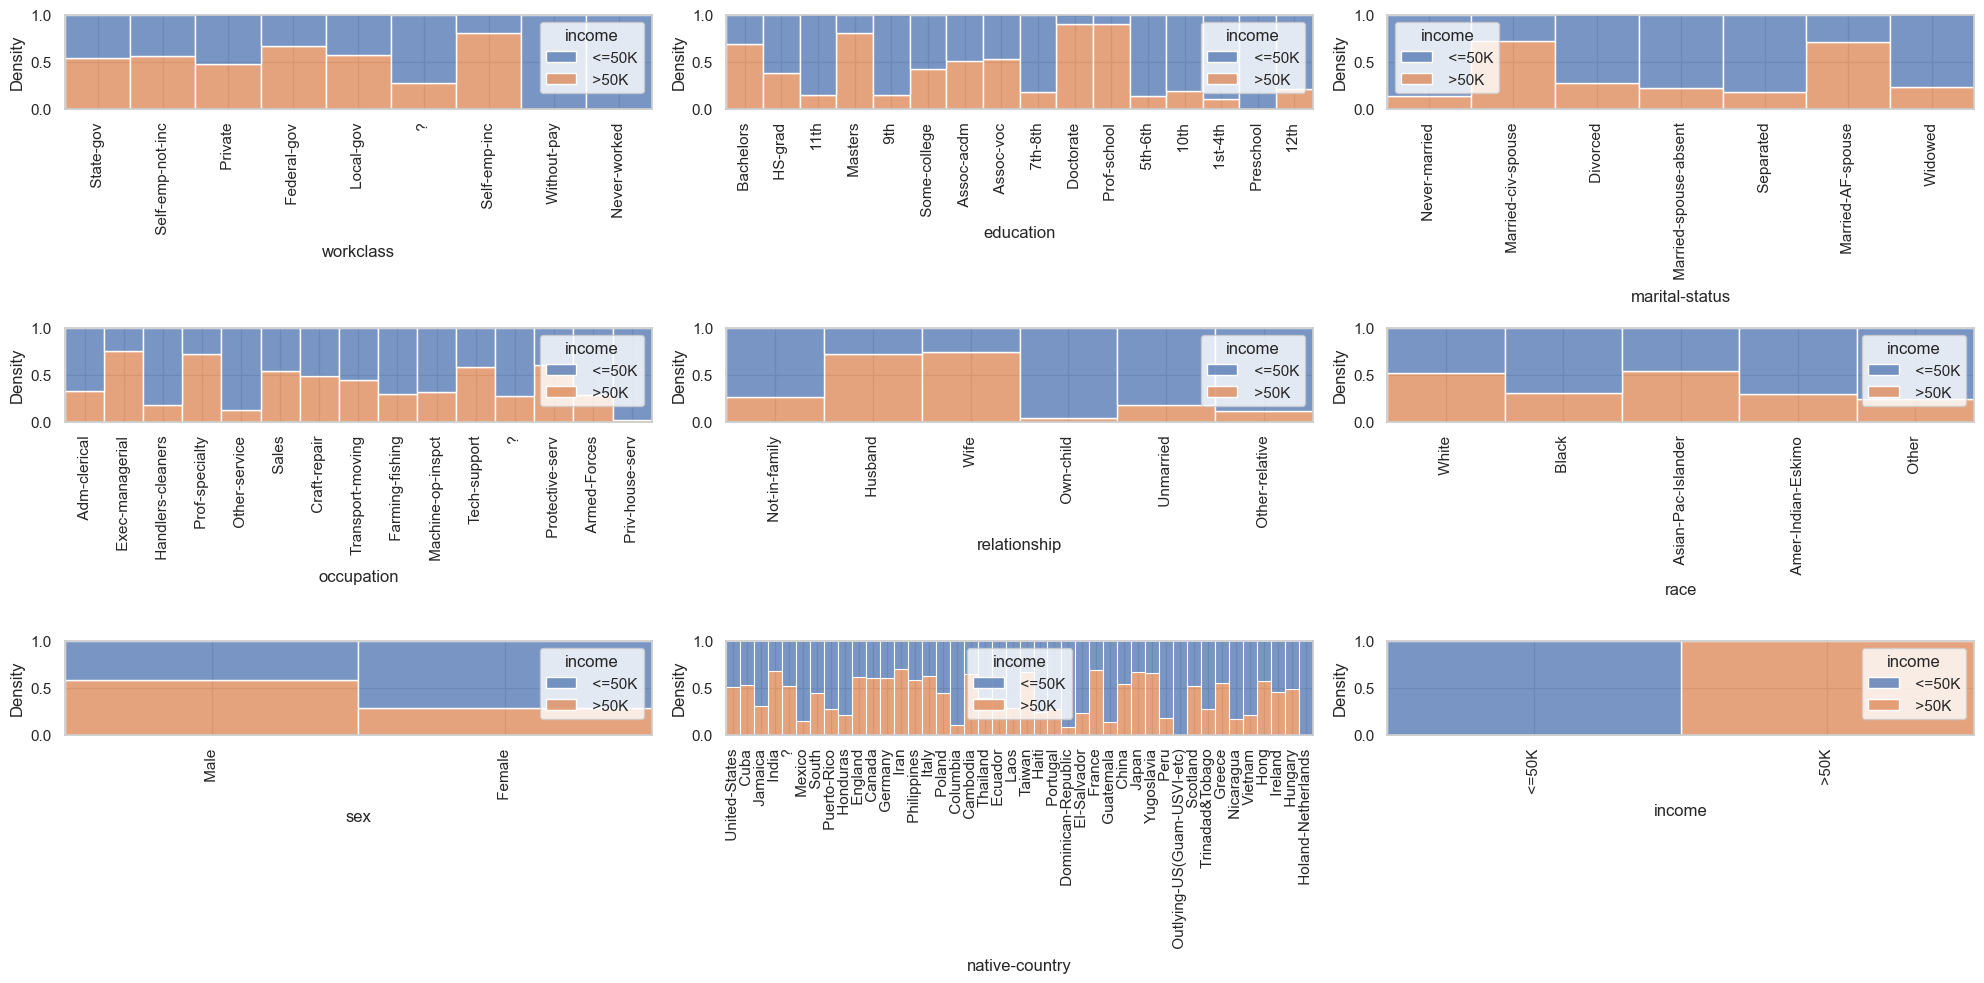

In [77]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue="income", data=df, ax=axs[i], multiple="fill", kde=False, element="bars" , fill=True, stat="density", common_norm=False, common_bins=False, discrete=(var in cat_vars))
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_xlabel(var)

fig.tight_layout()

plt.show()

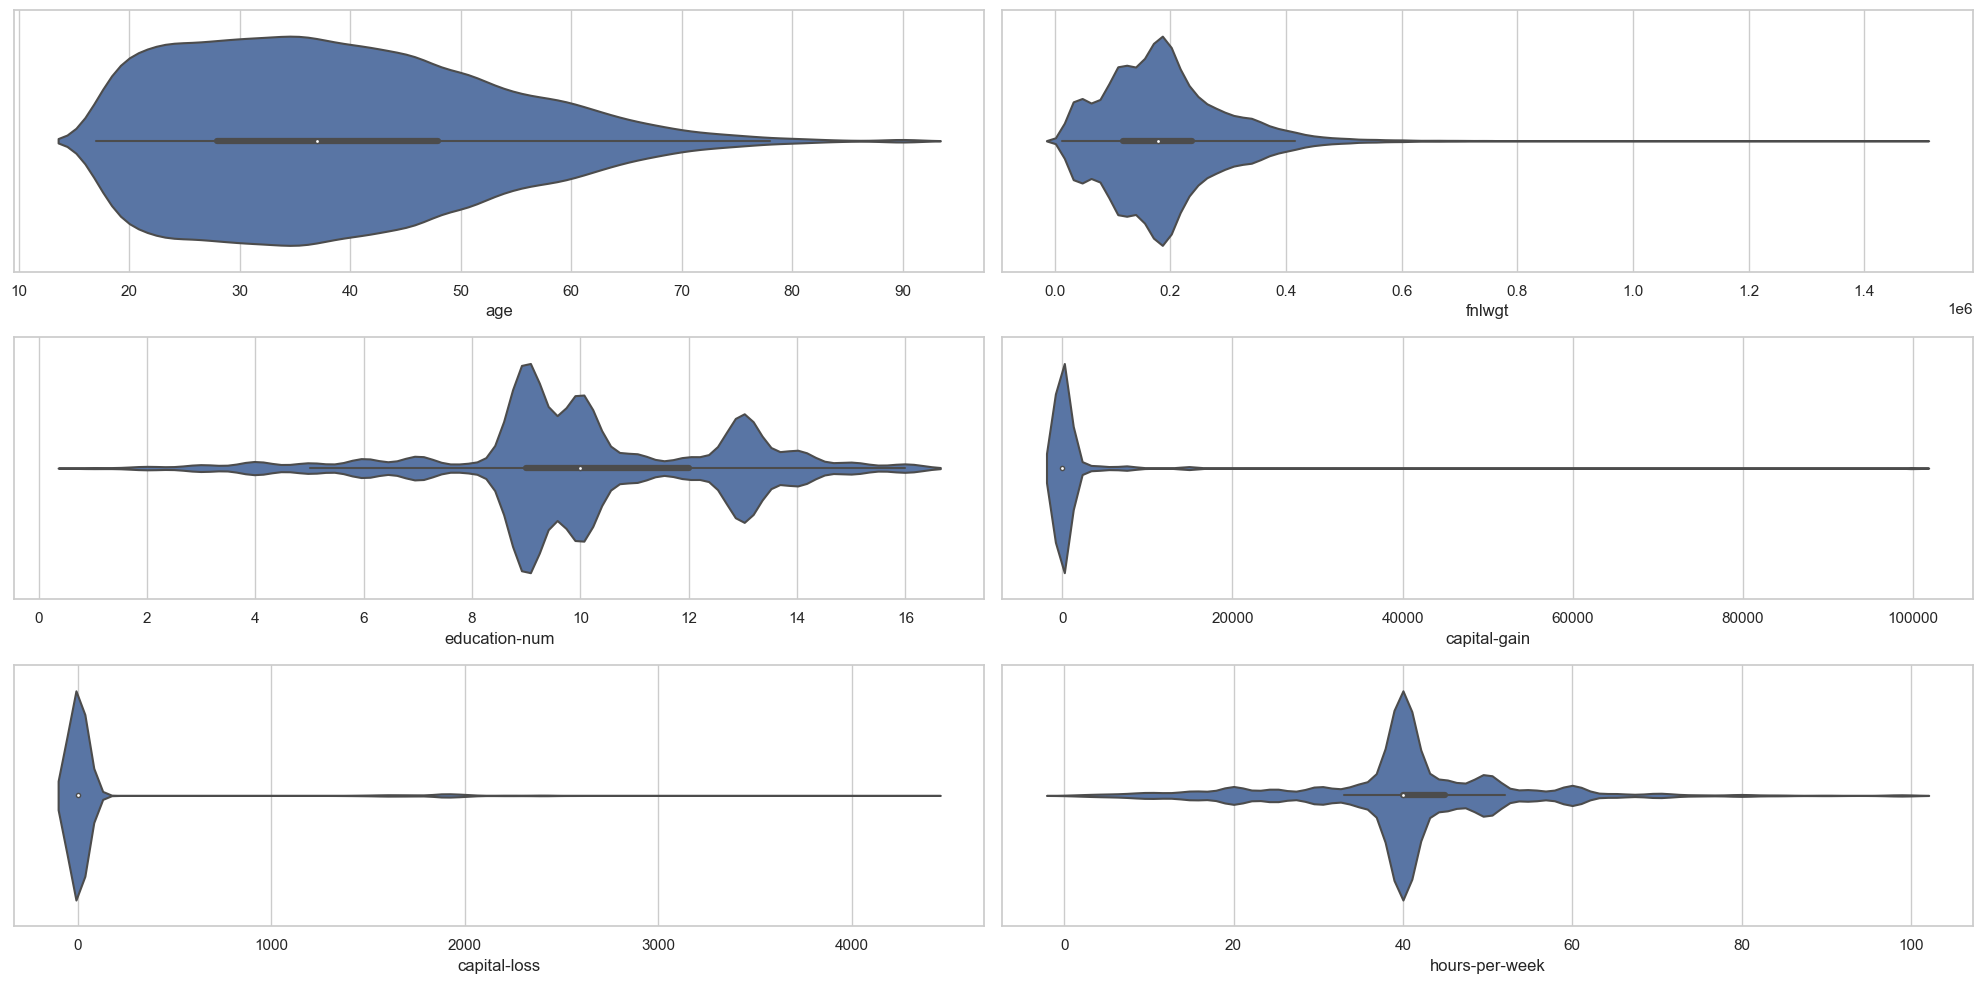

In [66]:
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df_numerical, ax=axs[i])

fig.tight_layout()

plt.show()

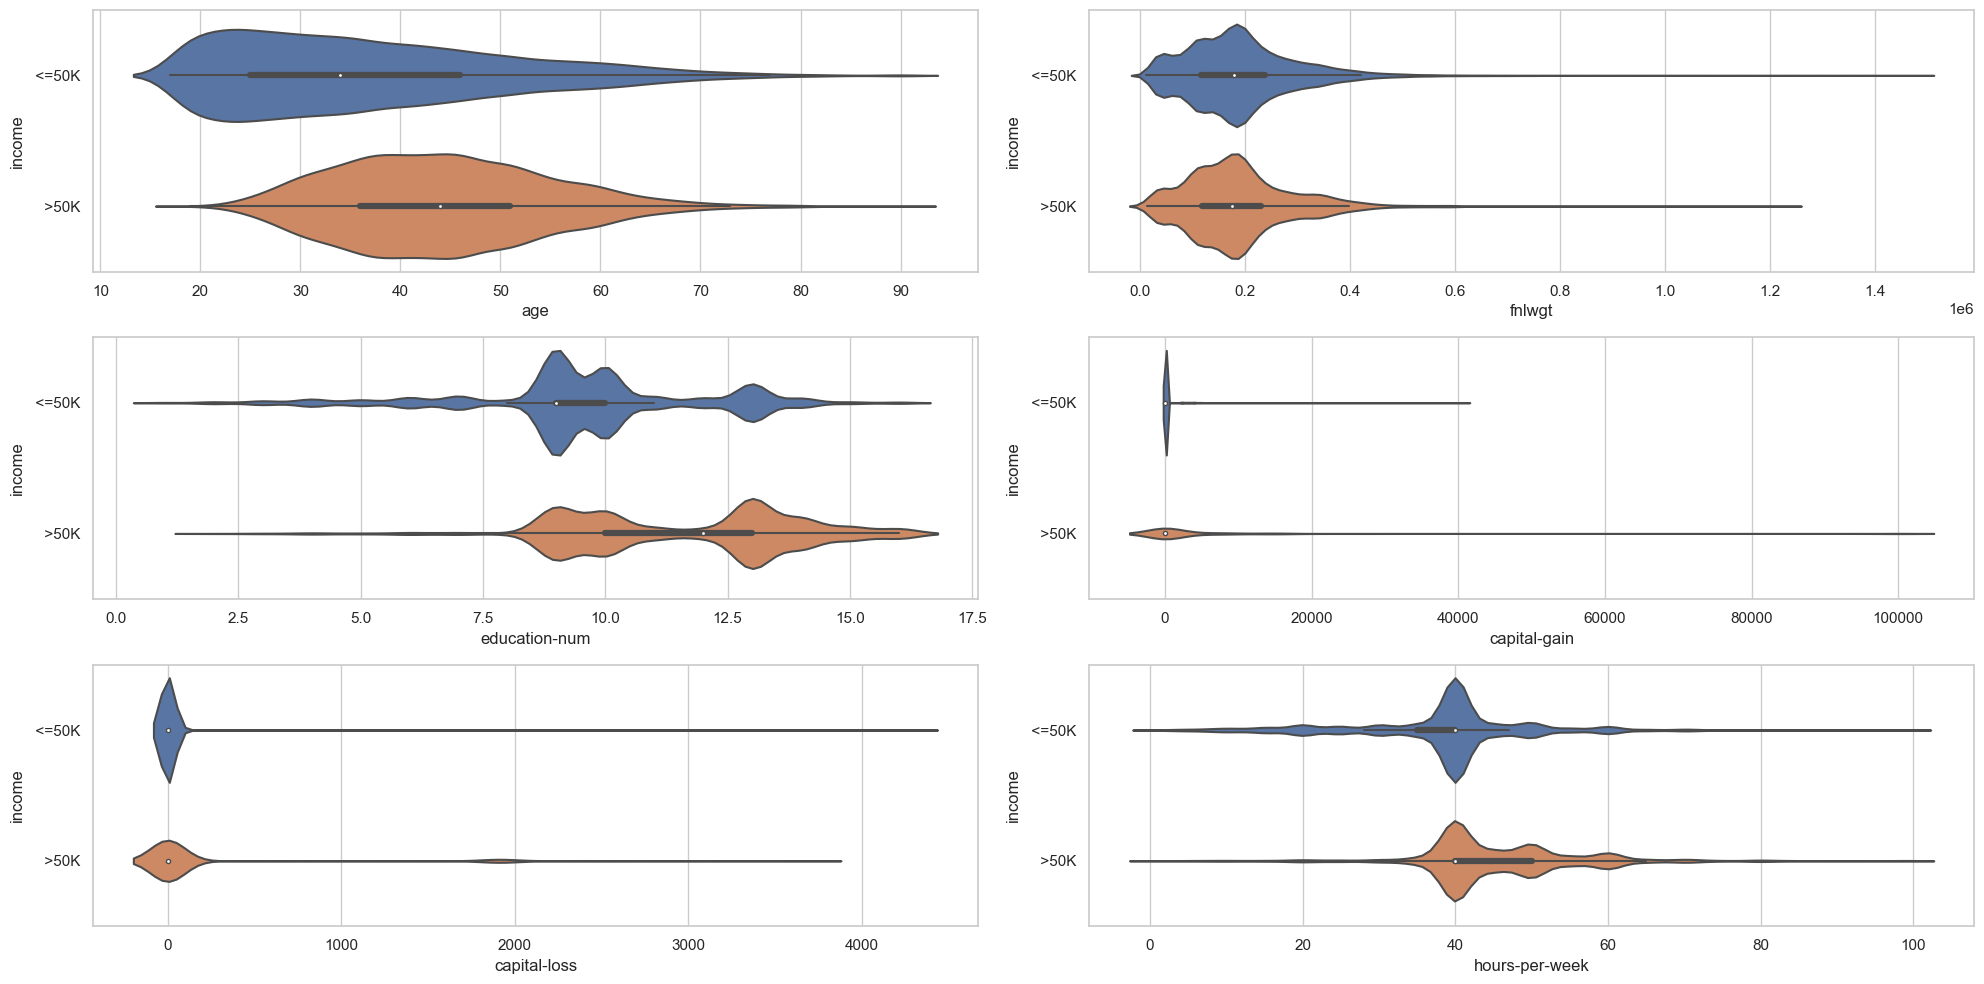

In [68]:
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
axs = ax.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, y='income', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

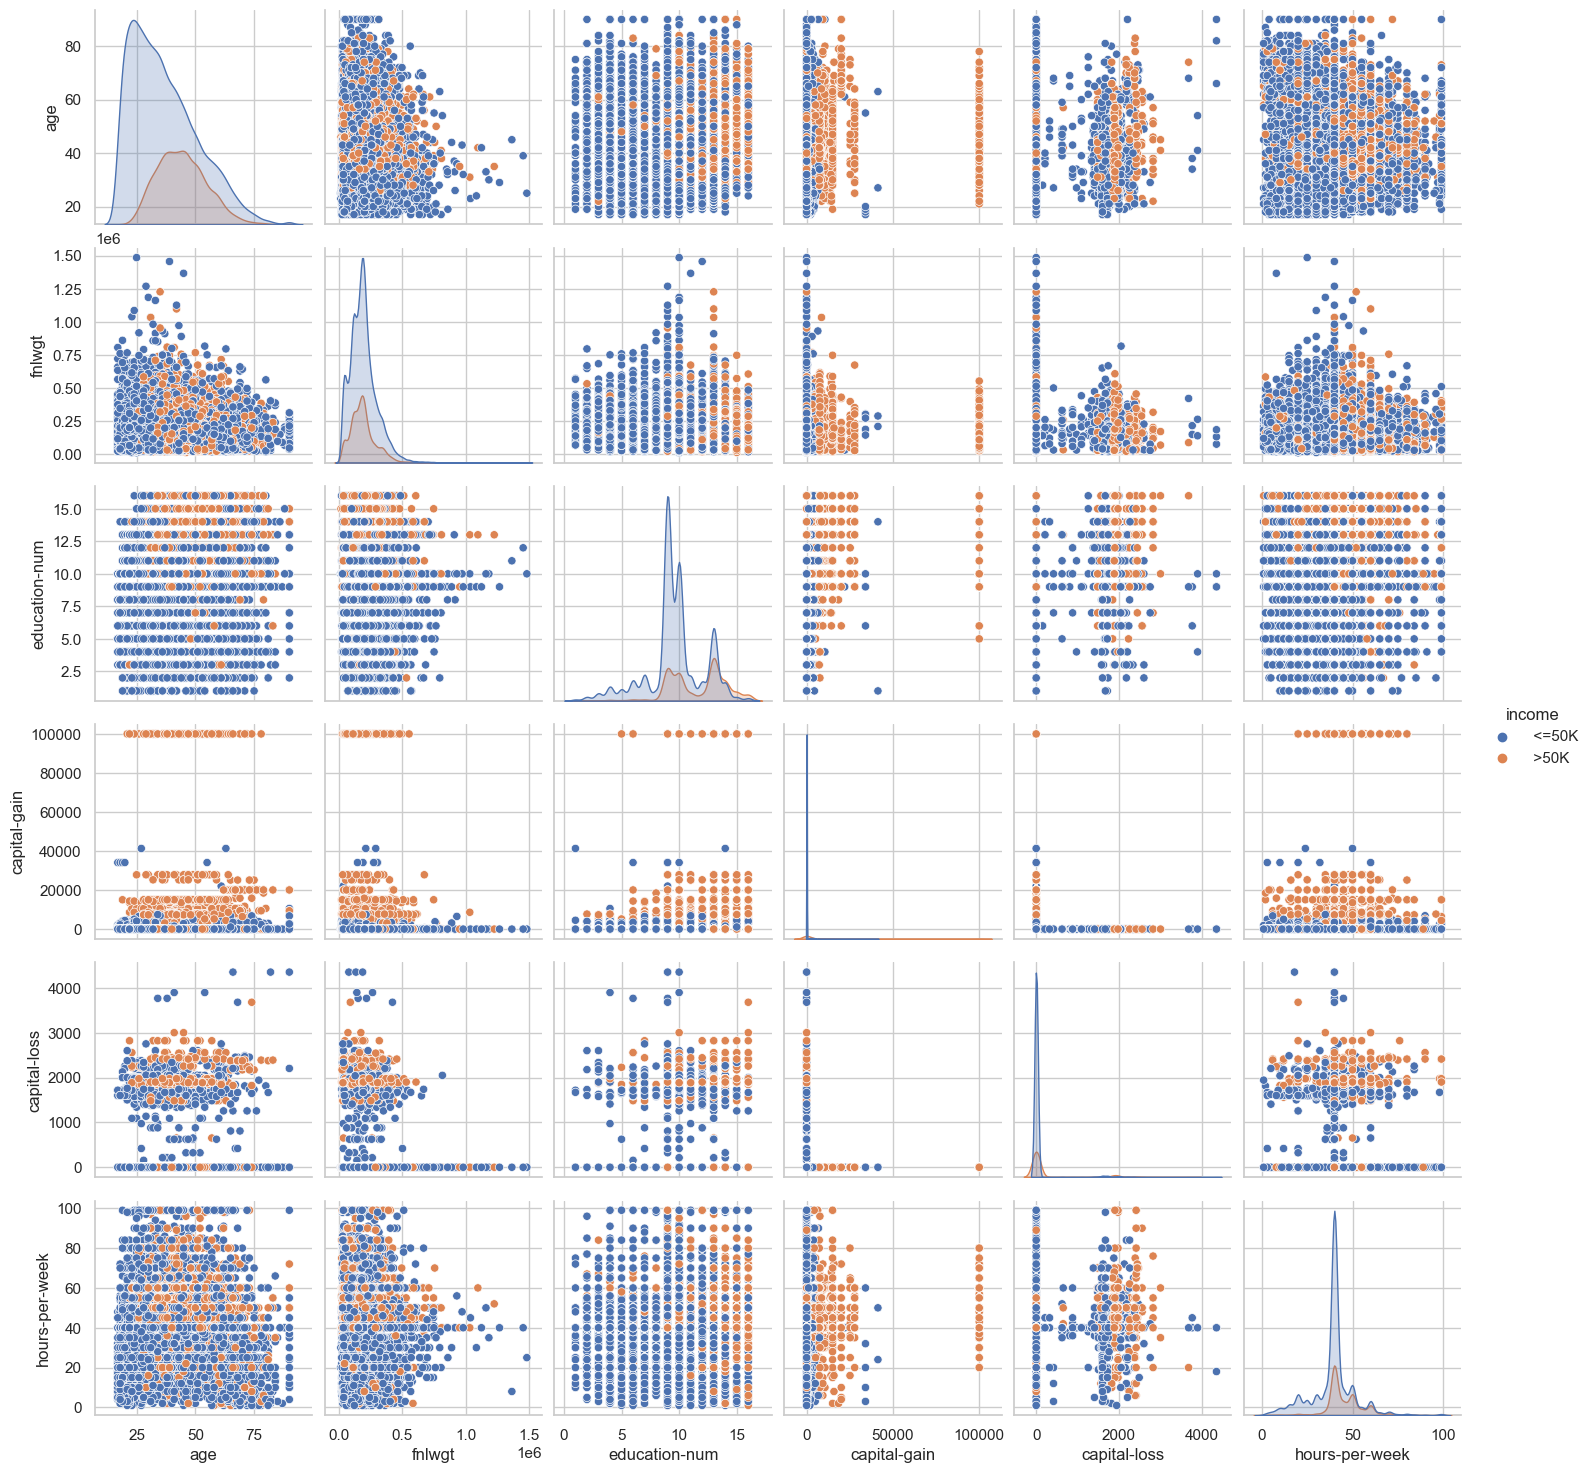

In [69]:
sns.pairplot(df, hue='income', vars=num_vars)